# **Real Estate Industry Project**



## **Data Collection and Pre-processing**

The first step in our analysis involved scraping rental listings from domain.com.au. Basic preprocessing tasks were carried out, including joining listings with their corresponding SA2 zone, removing outliers, imputing missing values (primarily for beds, baths and parkings) and extracting prices from inconsistent listings using RegEx. 

## **Contextual Data Collection**
In parallel, we gathered data on various socio-economic factors, utilities, and services to provide context for each property’s location within the Statistical Area Level 2 (SA2). This data offered a detailed understanding of the surrounding environment of the properties. Some of the data explored included:
- Population (Current and Projected)
- Income levels
- Parks and green spaces
- Recreational facilities
- Crimes and property lost incidents
- Hospitals and healthcare facilities
- Public transport Accessibility
- CBD distance
- Schools and educational facilities
- Shopping centres

## **Distance Data Collection**
We also calculated the distance from each property to the nearest train station and the Melbourne CBD using [OpenRouteService API](https://openrouteservice.org/) along with straight line distances from nearest Hospital, Park and School. This information was crucial in determining the accessibility of essential services and amenities for each property.

Finally, to discover temporal trends in rental prices, we used the historical rental prices data to fit an [ARIMA model](https://en.wikipedia.org/wiki/Autoregressive_integrated_moving_average) and forecast growth over next 3 years.

## **Question 1:**
###  What are the Most Important Internal and External Factors

We implemented two machine learning models - Random Forest Regressor and XGBoost, to answer this question. 
We started with our final dataset where we combined various features relating to public transport (train stations), schools, income, parks, crime and shopping centres. Next, we performed correlation analysis to check for linear relationships between features. We identified pairs of features that were highly correlated with one another (Pearson correlation coefficient > 0.9) , using this information to remove redundant features. After this preprocessing, we implemented two machine learning models, a Random Forest Regressor and XGBoost. Once we had feature importance rankings, we proceeded to find the features with highest average importance across the two models, which we have identified as the top 10 most important features for predicting rental prices.

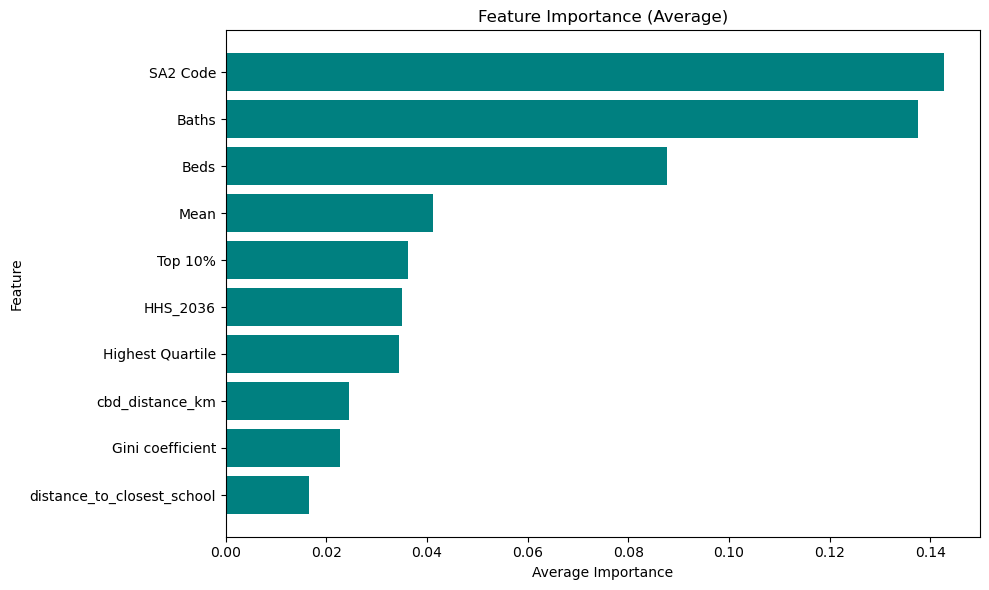

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

top_10_features = pd.read_csv("../data/curated/top_10")
def plot_fig():
    plt.figure(figsize=(10, 6))
    plt.barh(top_10_features['Feature'], top_10_features['avg_importance'], color='teal')
    plt.xlabel('Average Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importance (Average)')
    plt.gca().invert_yaxis()  # To display the highest importance at the top
    plt.tight_layout()

    # Show the plot
    plt.show()
plot_fig()

![Top 10 Features Importance](../plots/top_10_features.jpg)

The top 10 most important features after our modelling can be grouped into three key categories: 
- Location of the property
- Property structure, specifically its size
- Suburb population demographics.

 Based on these insights, we have a few key recommendations to share.

For renters:
- Understand your affordability by comparing their earnings with the income levels of the population in the area. 
- Consider rental price growth - if they plan to stay long-term, aim for suburbs with slower rental price increases, which our further modelling can help them identify.
- The third advice is to balance location and affordability by thinking about the trade-offs they’re willing to make between the two. 

For investors: 
- Unlike renters, they should target suburbs with high rent growth. When deciding where to invest, they should consider factors like proximity to the CBD, the nearest schools, and the size of the property, based on your investment capacity.

For policymakers:
- If the goal is to maintain a healthy and growing rental market, one approach is to invest in school infrastructure, as this can help drive growth in areas with potential


## **Question 2:**

### Where are the most liveable and affordable suburbs?

The liveability and affordability metrics are displayed in the following two pie charts.

<img src="../plots/pie_chart.png" alt="Metrics Pie Chart" width="900" />

### Liveability Metrics
On the left, we have the *liveability metrics*, which consist of six key elements. Each segment highlights an essential aspect of what makes a place enjoyable and sustainable to live in. 
- **Mobility** holds the largest share at 35%, emphasizing the importance of transportation options and accessibility to the Central Business District (CBD). This metric reflects how well residents can move around the city, impacting their overall quality of life.
- **Safety** accounts for 20%, highlighting the need for secure neighborhoods in relation to crime rates, specifically in property lost incidents. A safer environment contributes significantly to residents' peace of mind and overall satisfaction with their living conditions.
- **Community Amenities** contributes 15%, focusing on the availability of green spaces, shopping centers, and entertainment facilities. Access to these amenities enhances residents' recreational options and promotes community engagement.
- **Healthcare** also takes up 15%, indicating the proximity and availability of local hospitals and medical facilities. Access to healthcare services is crucial for residents' well-being and emergency care.
- **Education** is next at 10%, emphasizing the number of independent schools available in the area. Quality educational options are vital for families and can significantly influence a neighborhood's attractiveness.
- **Price** accounts for 5%, underscoring how housing costs impact liveability. This metric highlights the financial aspect of living in an area and its effect on residents' ability to maintain a good quality of life.


### Affordability Metrics
On the right, we have the *affordability metrics*, consisting of four factors.
- **Income-to-Price Ratio (IPR)** stands out with 40%, indicating the relationship between income levels and housing costs. A higher ratio suggests that residents are less burdened by housing expenses, making it easier for them to afford their homes.
- **Housing Pressure Index (HPI)** follows at 30%, measuring the stress on housing markets. This index helps assess whether the demand for housing exceeds the available supply, which can lead to increased prices and reduced affordability. 
- **Population Density Inverse (PDI)** accounts for 20%. This metric reflects the inverse of population density; lower density can imply more spacious living conditions and potentially more affordable housing options.
- **Gini Inequality Inverse (GII)** contributes 10%, underscoring economic disparity in housing access. A higher GII value indicates greater income equality, suggesting that more individuals have a fair chance to access affordable housing.

In summary, these metrics help us understand the balance between what makes a community livable and what is affordable, guiding our efforts in urban planning and policy development. 

### Housing Affordability Metrics

1. **Income-to-Price Ratio (IPR)**: Measures the affordability of housing relative to income.
   It is calculated as:
   $$ \text{IPR} = \frac{\text{Median Income}}{\text{Median Housing Price}} $$

2. **Housing Pressure Index (HPI)**: Measures the availability of housing.
   A higher HPI indicates less pressure on housing supply, calculated as:
   $$ \text{HPI} = 1 - \left( \frac{\text{Occupied Housing}}{\text{Estimated Resident Population}} \right) $$

3. **Population Density Inverse (PDI)**: The inverse of population density, indicating potential housing affordability.
   It is calculated as:
   $$ \text{PDI} = \frac{1}{\text{Population Density (persons per km}^2\text{)}} $$

4. **Gini Inequality Inverse (GII)**: Represents income equality; higher values indicate less income inequality.
   It is calculated as:
   $$ \text{GII} = 1 - \text{Gini Coefficient} $$


## **Question 3:**
Next, let's shift our focus to suburbs from an investment standpoint, specifically targeting areas with significant potential for rental price growth.

To identify these high-growth suburbs, we utilized an ARIMA time-series model. This model incorporates historical trends, growth rates, and seasonal patterns to forecast rental prices over the next three years.

Our analysis reveals that regional suburbs are set to experience the most notable growth with Some areas are projected to grow by as much as 23.6% within just three years.

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

top_10_suburbs = pd.read_csv('../data/curated/top_10_suburbs.csv')
# Bar plot of the top 10 suburbs with the highest growth percentage
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=top_10_suburbs, y="suburb", x="Growth Percentage", ax=ax, color="#000F46")
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '../data/curated/top_10_suburbs.csv'

<img src="../plots/top_10_suburbs.png" alt="top_10_suburbs" width="900"/>

While these suburbs may not initially stand out as prime investment candidates, they exhibit strong and stable growth trends, positioning them for substantial, reliable returns as they gain traction and become more mainstream.

With rising demand driven by urban expansion and infrastructure developments, these suburbs are set to capitalize on emerging market dynamics.

Investors looking for steady, long-term returns will find these areas particularly attractive, offering both resilience and significant ROIs.

In [ ]:
historical_data_top_10 = pd.read_csv('../data/curated/historical_data_top_10.csv')
predicted_data_top_10 = pd.read_csv('../data/curated/predicted_data_top_10.csv')

historical_data_top_10["Date"] = pd.to_datetime(historical_data_top_10["Date"])
predicted_data_top_10["Date"] = pd.to_datetime(predicted_data_top_10["Date"])

fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data=historical_data_top_10, x="Date", y="Median", hue="suburb", ax=ax, errorbar=None, legend=False)
sns.lineplot(data=predicted_data_top_10, x="Date", y="Median", hue="suburb", ax=ax, errorbar=None)
plt.legend(title='Suburb', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig("../plots/top_10_suburbs_growth_rates.png", transparent=True, dpi=300, bbox_inches = 'tight')
plt.show()

<img src="../plots/top_10_suburbs_growth_rates.png" alt="Top 10 Suburb Growth Rates" width="900"/>

On the other hand, the currently well-regarded suburbs, despite showing the greatest overall growth over the entire timeframe, are marked by significant price volatility and a lack of consistent growth patterns. This combination makes them high-risk, low-return investments.

Much of their growth can be attributed to the market recovery following the 2008 Wall Street crash. Now, reaching peak development, these suburbs—while highly desirable for liveability—no longer present strong potential for high investment returns.

![volatile_suburbs](../plots/volatile_top_10.png)

### Geospatial Visualization
Next, we observe the geospatial visualization of the liveability and affordability Indexes. On the left, we have the *liveability index distribution in Victoria*, while the right displays the *affordability index distribution*. The color bar on the side indicates that lighter colors signify higher index values. Both distributions show significant variation across the region.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
import geopandas as gpd
import contextily as ctx
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import FormatStrFormatter

def plot_map_with_colorbar(sf, column, ax, cmap_name='viridis', n_colors=8, title="", crs_string="", alpha=0.5, bounds=None):
    '''
    Plots a geospatial map with a discrete color bar on the side.

    Parameters:
        sf: The GeoDataFrame containing the spatial data to be plotted
        column: The name of the column in `sf` to be visualized on the map
        ax: The matplotlib axis object on which the map will be plotted
        cmap_name: The name of the colormap to use (default is 'viridis')
        n_colors: The number of discrete colors in the colormap (default is 8)
        title: The title of the map (default is an empty string)
        crs_string: The Coordinate Reference System (CRS) as a string for adding the basemap (default is "")
        alpha: The transparency level for the map elements (default is 0.5)
        bounds: The boundaries for the color bar (default is None)

    Returns:
        ax: The axis object with the plotted map
        cbar: The color bar associated with the plot
    '''
    if bounds is None:
        bounds = np.linspace(sf[column].min(), sf[column].max(), n_colors + 1)
    
    cmap = plt.get_cmap(cmap_name, n_colors)
    norm = BoundaryNorm(bounds, cmap.N)

    im = sf.plot(column=column, ax=ax, legend=False, edgecolor='black', alpha=alpha, cmap=cmap, norm=norm)

    ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, crs=crs_string, alpha=1, attribution=False)

    ax.set_title(title, weight="bold", fontsize=14)
    ax.set_xlabel("")  
    ax.set_ylabel("")  
    
    ax.tick_params(axis='both', which='major', labelsize=7)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="3%", pad=0.1)
    cbar = plt.colorbar(im.collections[0], cax=cax, norm=norm, boundaries=bounds, ticks=bounds)
    cbar.ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

    cbar.outline.set_linewidth(0)
    cbar.ax.tick_params(size=0)  

    return ax, cbar

<img src="../plots/avg_liveability_affordability_metropolitan_plot_solid.png" alt="Metrics Pie Chart" width="1300" />

The top suburbs for liveability are located in Melbourne's **southeastern suburbs**. These areas are highly sought after for their excellent public transport, strong safety, quality healthcare, and outstanding schools. In contrast, suburbs known for **affordability** are found on the **outskirts** of Melbourne due to lower demand compared to central areas. 

#### **The Top 10 Suburbs Based on Our liveability & Affordability Metrics:**

<img src="../plots/Top_liveability_and_affordability.png" alt="Top Liveability and Affordability" width="900" />

#### **Combined index of liveability and affordability:**

<img src="../plots/combined_index_metropolitan_plot_solid.png" alt="Metrics Pie Chart" width="900" />

<img src="../plots/overall_top.png" alt="Metrics Pie Chart" width="900" />

After applying a 60%, 40% weights to liveability and affordability, **Prahran - Windsor** stands out for its vibrant lifestyle, offering excellent transport links, shopping, cafes, and nightlife, as well as strong connectivity to Melbourne’s CBD. These areas, located at a comfortable distance—within 15km to the city—provide valuable insights for renters seeking a perfect balance between livability and affordability. 

## **Challenges experienced:**

1) The ORS API’s 2000 daily request limit challenged our need to process 10,000 properties, which we managed by batching, caching, and aggregating calls.
2) We also faced a mismatch between SA2 codes and suburb names, resolved by mapping suburbs to their SA2 codes for consistent analysis. 


## **Key Assumptions:**

### 1) Independence:
 We've assumed that each property in the dataset is independent, implying that the features of one property do not affect those of the others. Furthermore, we have assumed that the various features of an individual property are independent of one another.

### 2) Linear Relationships: 
We've performed correlation analysis under the assumption that the relationships between features are linear. However, we acknowledge that this approach may overlook non-linear relationships in the data.

### 3) Absence of Major Macroeconomic Factors:
In our model, we’ve assumed that there won’t be any major disruptions, such as economic downturns or events like COVID-19, when predicting future rental growth.

### 4) Data Representativeness: 
We’ve assumed that the dataset is a good representation of the broader property market, ensuring that our model's predictions are generalisable to other properties beyond our dataset.



## **Limitations:**

### 1) Historical growth limited to a few suburbs

**Impact:**
- Missing cyclical patterns over months & years.
- Decreased accuracy in long-term predictions.

**For Future:**
- Acquire historical data through different vendors.
- Perform feature engineering using similar suburb data determined by more comprehensive datasets.


### 2) Government-provided dataset found online is incomplete in providing all details to date.

**Impact:**
- Biased prediction, giving advantage to suburbs with complete information.

**For Future:**
- Manual population of missing data if required.
- Perform feature engineering using similar suburb data determined by more comprehensive datasets.


## **Security Practices:**
With the large scale of the project, and the mostly online nature, our team ensured that industry standard security and privacy measures were followed.
- All Private Data shared via Secured Medium (WhatsApp) with end-to-end encryption.
- API Keys (mainly OpenRouteService) were kept Offline at all times (local `.env` files)
- Rules in `robots.txt` followed while scraping domain.com.au

We strongly believe that this analysis can be used by various stakeholders like renters, investors and policymakers to understand Victoria's real estate market, and insights like Liveability, Affordability and Growth can be directly converted to profitable business models and development strategies.

And thus to facilitate easy access to these insights, we are in process of building a comprehensive dashboard to explore our current findings and monitor how the market trends change in the future for sustainable growth and development. We expect to complete this by January 2025.

#### **A first look at the dashboard is as follows:**


<img src="../extras/dashboard.jpg" alt="Dashboard" width="1500"/>